Verify results from rex_nea_vs_fwhm.py

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

from scipy.interpolate import griddata

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [7]:
band = 'g'
nea_path = '/global/cfs/cdirs/desi/users/rongpu/imaging_mc/nea/nea_vs_fwhm_{}_1024.fits'.format(band)

nea = Table(fitsio.read(nea_path))
nea_arr = np.array(nea['nea'])

hdr = fitsio.read_header(nea_path, ext=1)
shape_r_grid = np.arange(hdr['R_MIN'], hdr['R_MAX']+hdr['R_DELTA'], hdr['R_DELTA'])
fwhm_grid = np.array(nea['fwhm_bin'])

def nea_model(r, fwhm):
    points = np.array([r, fwhm]).T
    nea_predict = griddata(np.array([np.tile(shape_r_grid, len(nea)), np.repeat(np.array(nea['fwhm_mean']), len(shape_r_grid))]).T, nea_arr.flatten(), points, method='linear')
    if np.sum(np.isnan(nea_predict))>0:
        nea_predict_nearest = griddata(np.array([np.tile(shape_r_grid, len(nea)), np.repeat(np.array(nea['fwhm_mean']), len(shape_r_grid))]).T, nea_arr.flatten(), points, method='nearest')
        nea_predict[np.isnan(nea_predict)] = nea_predict_nearest[np.isnan(nea_predict)]
    return nea_predict

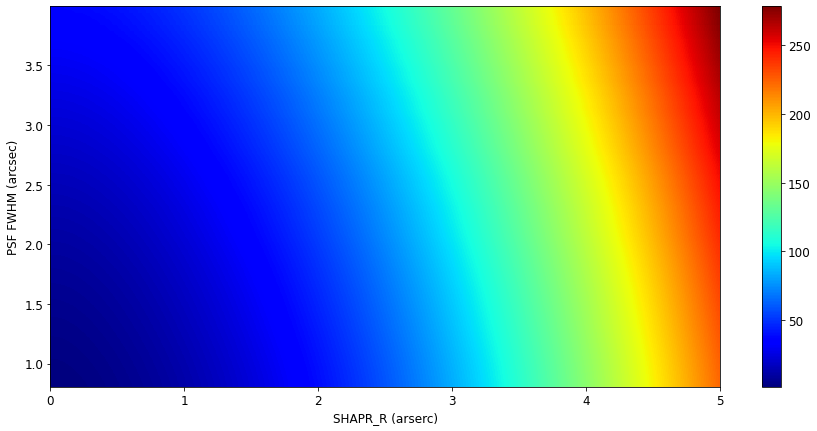

In [8]:
plt.figure(figsize=(15, 7))
plt.imshow(nea_arr, origin='lower', cmap='jet', aspect='auto',
           extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
plt.xlabel('SHAPR_R (arserc)')
plt.ylabel('PSF FWHM (arcsec)')
plt.colorbar()
plt.show()

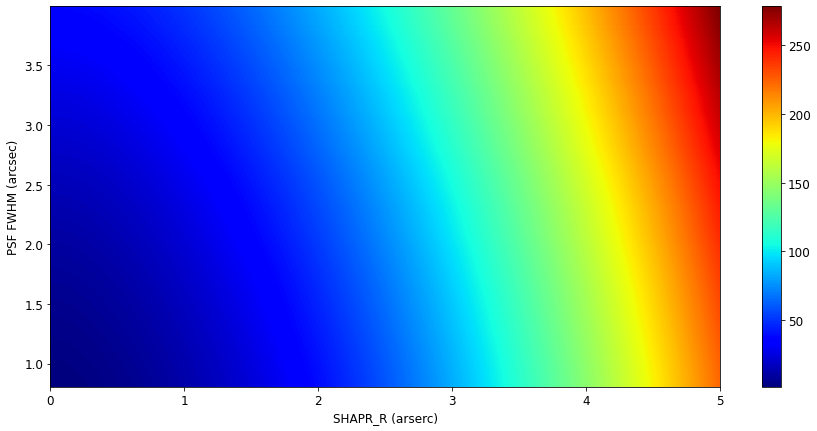

In [9]:
fwhm_mesh, r_mesh = np.meshgrid(fwhm_grid, shape_r_grid)
nea_predict = nea_model(r_mesh, fwhm_mesh)

plt.figure(figsize=(15, 7))
plt.imshow(nea_predict, origin='lower', cmap='jet', aspect='auto',
           extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
plt.xlabel('SHAPR_R (arserc)')
plt.ylabel('PSF FWHM (arcsec)')
plt.colorbar()
plt.show()

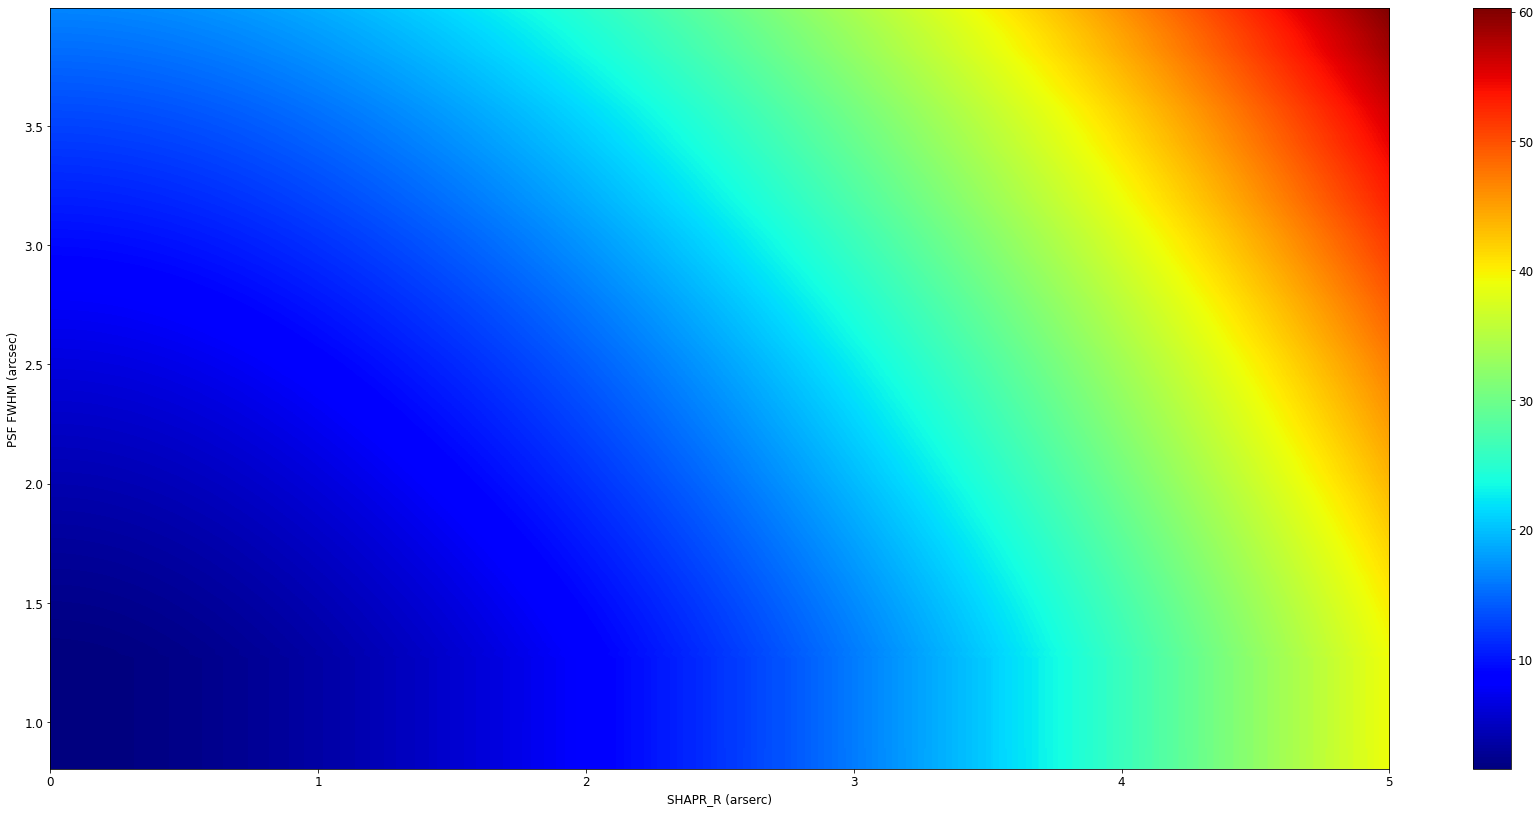

In [10]:
r_plot = np.arange(0., 2, 0.003)
fwhm_plot = np.arange(0.5, 2.6, 0.003)

fwhm_mesh, r_mesh = np.meshgrid(fwhm_plot, r_plot)

nea_predict = nea_model(r_mesh, fwhm_mesh)

plt.figure(figsize=(30, 14))
plt.imshow(nea_predict, origin='lower', cmap='jet', aspect='auto',
           extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
plt.xlabel('SHAPR_R (arserc)')
plt.ylabel('PSF FWHM (arcsec)')
plt.colorbar()
plt.show()